In [34]:
import keras
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


from keras.models import load_model
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#saves the model info as json file
    
model.save_weights("cnn.h5")
# Creates a HDF5 file 'model.h5'
#model.save('cnn.h5')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
469/469 [==============================] - 151s 321ms/step - loss: 0.2404 - accuracy: 0.9259 - val_loss: 0.0508 - val_accuracy: 0.9836
Test loss: 0.050819315016269684
Test accuracy: 0.9836000204086304


In [27]:
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import model_from_json

In [35]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
print(loaded_model.summary())
# load weights into new model
loaded_model.load_weights("cnn.h5")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_7 (Dense)             (None, 128)               1179776   
                                                      

In [68]:
#!pip install opencv-python
import cv2
import matplotlib.pyplot as plt
import numpy as np


img = cv2.imread('test1.png',0)
# print(img.shape)
resized = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
# print(resized.shape)

x = np.invert(resized)
# x = resized
# plt.imshow(x)
x = x.reshape(1,28,28,1)
x = x.astype('float32')
x /= 255

out = loaded_model.predict(x)
# print(out)
print(np.argmax(out))

1


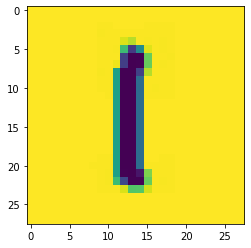

In [67]:
plt.imshow(resized)